In [1]:
from Params.path_params import Data_path
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
import datetime

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
jdata_path = "{0}/JData".format(Data_path)

In [4]:
login_train_file = "{0}/t_login.csv".format(jdata_path)
login_test_file = "{0}/t_login_test.csv".format(jdata_path)

In [5]:
trade_train_file = "{0}/t_trade.csv".format(jdata_path)
trade_test_file = "{0}/t_trade_test.csv".format(jdata_path)

In [6]:
trade_train = pd.read_csv(trade_train_file)

In [7]:
login_train = pd.read_csv(login_train_file)

In [8]:
trade_train['time'] =pd.to_datetime(trade_train['time'], utc=True)

In [9]:
login_train[['is_scan','is_sec']] = login_train[['is_scan','is_sec']].astype(int)
login_train = login_train.drop('timestamp', axis=1)
login_train['time'] = pd.to_datetime(login_train['time'], utc=True)
login_train = login_train.rename(columns={'time':'login_time'})

In [10]:
trade_train.head(5)

,rowkey,time,id,is_risk
0,3,2015-01-01 00:00:41+00:00,27863,0
1,6,2015-01-01 00:00:46+00:00,115201,0
2,13,2015-01-01 00:01:02+00:00,143711,0
3,32,2015-01-01 00:03:00+00:00,172699,0
4,43,2015-01-01 00:03:52+00:00,53265,0


In [11]:
login_train.head(5)

,log_id,timelong,device,log_from,ip,city,result,type,id,is_scan,is_sec,login_time
0,2.618369e+15,5.0,879361,10,1026491,194,1,1,116825,1,0,2015-04-10 12:54:19+00:00
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1,109987,0,0,2015-04-12 11:20:45+00:00
2,8.123343e+15,5.0,879361,10,1026491,194,1,1,116825,1,0,2015-03-30 16:38:20+00:00
3,3.265677e+14,6.0,879361,10,1026491,194,1,1,116825,1,0,2015-04-06 16:22:18+00:00
4,6.684659e+15,4.0,879361,10,1026491,194,1,1,116825,1,0,2015-04-05 15:55:01+00:00


In [12]:
trade_train.loc[~trade_train.id.isin(login_train.id)].id.nunique()

101

In [13]:
login_train.id.loc[login_train.id.isin(trade_train.id)].shape

(579631,)

In [14]:
login_train.loc[login_train.id.isin(trade_train.id)].id.nunique()

25943

In [15]:
login_train.id.nunique()

27155

In [16]:
trade_train.id.nunique()

26044

In [17]:
df = login_train.merge(trade_train, on='id', how='left')

In [18]:
df.shape

(7898199, 15)

In [19]:
df.dtypes

log_id                    float64
timelong                  float64
device                      int64
log_from                    int64
ip                          int64
city                        int64
result                      int64
type                        int64
id                          int64
is_scan                     int64
is_sec                      int64
login_time    datetime64[ns, UTC]
rowkey                    float64
time          datetime64[ns, UTC]
is_risk                   float64
dtype: object

In [20]:
df.loc[df.login_time < df.time].shape

(4040462, 15)

In [21]:
df = df.loc[df.login_time < df.time]

In [22]:
# df.columns[df.isnull().any()]

In [23]:
df.is_risk.value_counts(normalize=True)

0.0    0.985673
1.0    0.014327
Name: is_risk, dtype: float64

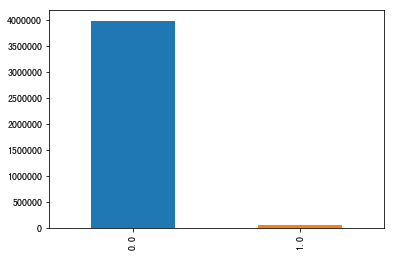

In [24]:
df.is_risk.value_counts().plot(kind='bar')

In [25]:
df = df.sort_values(['login_time', 'time'], ascending=[True, True])

In [26]:
df['rowkey'] = df['rowkey'].astype(int)

In [27]:
df.loc[df.id == 116825]

,log_id,timelong,device,log_from,ip,city,result,type,id,is_scan,is_sec,login_time,rowkey,time,is_risk
3934327,6.757646e+15,7000.0,979465,2,1026491,194,1,3,116825,0,0,2015-03-09 09:49:31+00:00,669212,2015-05-17 19:49:46+00:00,0.0
3934328,6.757646e+15,7000.0,979465,2,1026491,194,1,3,116825,0,0,2015-03-09 09:49:31+00:00,744487,2015-06-01 21:20:58+00:00,0.0
3934329,6.757646e+15,7000.0,979465,2,1026491,194,1,3,116825,0,0,2015-03-09 09:49:31+00:00,878373,2015-06-18 11:46:11+00:00,0.0
3934330,7.870658e+14,5000.0,979465,2,1026491,194,1,3,116825,0,0,2015-03-17 10:26:33+00:00,669212,2015-05-17 19:49:46+00:00,0.0
3934331,7.870658e+14,5000.0,979465,2,1026491,194,1,3,116825,0,0,2015-03-17 10:26:33+00:00,744487,2015-06-01 21:20:58+00:00,0.0
3934332,7.870658e+14,5000.0,979465,2,1026491,194,1,3,116825,0,0,2015-03-17 10:26:33+00:00,878373,2015-06-18 11:46:11+00:00,0.0
4,8.123343e+15,5.0,879361,10,1026491,194,1,1,116825,1,0,2015-03-30 16:38:20+00:00,669212,2015-05-17 19:49:46+00:00,0.0
5,8.123343e+15,5.0,879361,10,1026491,194,1,1,116825,1,0,2015-03-30 16:38:20+00:00,744487,2015-06-01 21:20:58+00:00,0.0
6,8.123343e+15,5.0,879361,10,1026491,194,1,1,116825,1,0,2015-03-30 16:38:20+00:00,878373,2015-06-18 11:46:11+00:00,0.0
20,3.120145e+15,12000.0,12239,2,1026491,194,1,3,116825,0,0,2015-03-31 15:58:48+00:00,669212,2015-05-17 19:49:46+00:00,0.0


In [28]:
df.head(5)

,log_id,timelong,device,log_from,ip,city,result,type,id,is_scan,is_sec,login_time,rowkey,time,is_risk
262133,7.775528e+15,0.0,421584,2,1327200,364,1,1,113124,0,0,2015-01-01 00:00:15+00:00,228883,2015-02-14 20:41:58+00:00,0.0
262134,7.775528e+15,0.0,421584,2,1327200,364,1,1,113124,0,0,2015-01-01 00:00:15+00:00,356263,2015-03-09 12:52:57+00:00,0.0
262132,7.775528e+15,0.0,421584,2,1327200,364,1,1,113124,0,0,2015-01-01 00:00:15+00:00,450274,2015-03-28 06:57:43+00:00,0.0
755780,2.350545e+16,2000.0,210427,2,1182527,103,1,3,9219,0,0,2015-01-01 00:00:54+00:00,266249,2015-02-21 13:04:22+00:00,0.0
755781,2.350545e+16,2000.0,210427,2,1182527,103,1,3,9219,0,0,2015-01-01 00:00:54+00:00,472527,2015-04-01 13:07:38+00:00,0.0


In [29]:
df['time_shift'] = df.groupby(['id'])['login_time'].shift(-1)

In [30]:
df.loc[df.id == 98286].head(100)

,log_id,timelong,device,log_from,ip,city,result,type,id,is_scan,is_sec,login_time,rowkey,time,is_risk,time_shift
1706064,9.203913e+15,2000.0,34446,2,1080760,70,1,1,98286,0,0,2015-01-01 00:18:42+00:00,189,2015-01-01 00:25:04+00:00,1.0,2015-01-01 00:18:42
1706065,9.203913e+15,2000.0,34446,2,1080760,70,1,1,98286,0,0,2015-01-01 00:18:42+00:00,205,2015-01-01 00:26:28+00:00,0.0,2015-01-01 00:18:42
1706066,9.203913e+15,2000.0,34446,2,1080760,70,1,1,98286,0,0,2015-01-01 00:18:42+00:00,211,2015-01-01 00:27:24+00:00,1.0,2015-01-01 00:18:42
1706062,9.203913e+15,2000.0,34446,2,1080760,70,1,1,98286,0,0,2015-01-01 00:18:42+00:00,23649,2015-01-05 00:24:40+00:00,1.0,2015-01-01 00:18:42
1706063,9.203913e+15,2000.0,34446,2,1080760,70,1,1,98286,0,0,2015-01-01 00:18:42+00:00,537455,2015-04-16 00:47:41+00:00,0.0,2015-01-01 00:18:42
1706067,9.203913e+15,2000.0,34446,2,1080760,70,1,1,98286,0,0,2015-01-01 00:18:42+00:00,635491,2015-05-10 15:32:35+00:00,0.0,2015-01-01 00:20:01
1706070,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,189,2015-01-01 00:25:04+00:00,1.0,2015-01-01 00:20:01
1706071,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,205,2015-01-01 00:26:28+00:00,0.0,2015-01-01 00:20:01
1706072,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,211,2015-01-01 00:27:24+00:00,1.0,2015-01-01 00:20:01
1706068,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,23649,2015-01-05 00:24:40+00:00,1.0,2015-01-01 00:20:01


In [31]:
df_trade = df.groupby('rowkey').last().reset_index()

In [32]:
df_trade.loc[df_trade.id == 98286].head(100)

,rowkey,log_id,timelong,device,log_from,ip,city,result,type,id,is_scan,is_sec,login_time,time,is_risk,time_shift
0,189,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,2015-01-01 00:25:04+00:00,1.0,2015-01-01 00:20:01
1,205,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,2015-01-01 00:26:28+00:00,0.0,2015-01-01 00:20:01
2,211,8.943675e+15,1000.0,365020,2,1080760,70,1,1,98286,0,0,2015-01-01 00:20:01+00:00,2015-01-01 00:27:24+00:00,1.0,2015-01-01 00:20:01
1559,23649,5.123796e+15,2000.0,835072,2,451870,70,1,3,98286,0,0,2015-01-05 00:22:39+00:00,2015-01-05 00:24:40+00:00,1.0,2015-01-05 00:22:39
67249,537455,7.818191e+15,5000.0,848101,2,868020,70,1,3,98286,0,0,2015-04-16 00:08:59+00:00,2015-04-16 00:47:41+00:00,0.0,2015-04-16 00:08:59
80246,635491,1.584641e+16,6.0,686273,10,451870,70,1,1,98286,1,0,2015-05-10 15:26:28+00:00,2015-05-10 15:32:35+00:00,0.0,2015-05-10 15:26:28


In [33]:
df1 = login_train.merge(df_trade[['login_time','is_risk', 'id']], on=['id','login_time'], how='left')

In [34]:
df1.shape

(651915, 13)

In [35]:
# df['time_shift'] = pd.to_datetime(df['time_shift'], utc=True)
# df.time_shift.fillna(df.time - datetime.timedelta(hours=1))

In [36]:
# df['time_shift'] = pd.to_datetime(df['time_shift'], utc=True)
# df['time_shift'] = df.time_shift.fillna(df.time - datetime.timedelta(hours=1))

In [37]:
# df1=df.groupby('id').filter(lambda x: ((x['login_time'] < x['time']) & (x['login_time'] > x['time_shift'])).all())

In [38]:
df1 = df1.set_index('login_time')

In [39]:
# df1.sort_index()

In [40]:
g2 = [pd.TimeGrouper('1D'),'id']

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  if __name__ == '__main__':


In [41]:
dg = df1[['id','is_risk']].groupby(g2)

In [42]:
def get_label(x):
#     print x
    if  x.any() == 1:
        return 1
    else:
        return 0

In [43]:
df_tr = dg.transform(lambda x: get_label(x))

In [44]:
df_tr.head(5)

,is_risk
login_time,
2015-04-10 12:54:19+00:00,0
2015-04-12 11:20:45+00:00,0
2015-03-30 16:38:20+00:00,0
2015-04-06 16:22:18+00:00,0
2015-04-05 15:55:01+00:00,0


In [45]:
df_tr.is_risk.value_counts()

0    643598
1      8317
Name: is_risk, dtype: int64

In [ ]:
df_tr.is_risk.value_counts()

In [50]:
df_tr.shape

(654918, 1)

In [51]:
df_tr = df_tr.rename(columns={'is_risk':'label'})

In [52]:
df_tr.index == df1.index

array([ True,  True,  True, ...,  True,  True,  True])

In [53]:
df_z =pd.concat([df1, df_tr], axis=1)

In [63]:
df_z.label.value_counts(normalize=True)

0    0.982068
1    0.017932
Name: label, dtype: float64

In [55]:
df_z.dtypes

log_id      float64
timelong    float64
device        int64
log_from      int64
ip            int64
city          int64
result        int64
type          int64
id            int64
is_scan       int64
is_sec        int64
is_risk     float64
label         int64
dtype: object

In [61]:
df_z.shape

(654918, 12)

In [58]:
df_z=df_z.drop(["is_risk", 'id'], axis=1)

In [59]:
df_z = df_z.reset_index()

In [60]:
df_z.head()

,login_time,log_id,timelong,device,log_from,ip,city,result,type,is_scan,is_sec,label
0,2015-04-10 12:54:19+00:00,2.618369e+15,5.0,879361,10,1026491,194,1,1,1,0,0
1,2015-04-12 11:20:45+00:00,9.969739e+14,16124.0,835072,1,1026491,194,1,1,0,0,0
2,2015-03-30 16:38:20+00:00,8.123343e+15,5.0,879361,10,1026491,194,1,1,1,0,0
3,2015-04-06 16:22:18+00:00,3.265677e+14,6.0,879361,10,1026491,194,1,1,1,0,0
4,2015-04-05 15:55:01+00:00,6.684659e+15,4.0,879361,10,1026491,194,1,1,1,0,0


In [ ]:
def get_time_cat(x):
    """
    get day of month
    :param x:
    :return:
    """
    day = x.day
    weekth = (day - 1) // 7 + 1
    dayofweek = x.dayofweek
    hour = x.hour
    return [weekth, dayofweek, day, hour]

In [ ]:
df_z['weekth'], df_z['dayofweek'], df_z['day'], df_z['hour'] = \
zip(*df_z['login_time'].apply(lambda x: get_time_cat(x)))

In [ ]:
df_z.head()

In [ ]:
df_z = df_z.drop('login_time', axis=1)

In [ ]:
df_z = df_z.drop('log_id', axis=1)

In [ ]:
df_z.head()

In [ ]:
df_z.log_from.value_counts()

In [ ]:
df_z.result.value_counts()

In [ ]:
df_z.type.value_counts()

In [ ]:
df_z[df_z.type.isnull()].shape

In [ ]:
df_z.weekth.value_counts()

In [ ]:
df_z.device.nunique()

In [ ]:
np.log(144399)

In [ ]:
np.log(df_z.log_from.nunique())

In [ ]:
np.log(df_z.ip.nunique())

In [ ]:
np.log(df_z.city.nunique())

In [ ]:
np.log(df_z.result.nunique())

In [ ]:
df_z.columns.difference(['week']).difference(['day']).difference(['label'])